In [1]:
import torch

# Gradient descent (نزول گرادیان)
 یک الگوریتم بهینه‌سازی است که برای بهبود پارامترهای یک مدل استفاده می‌شود 
### TORCH.AUTOGRAD
https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

> این عملیات موقع **یادگیری** شبکه‌های عصبی بسیار مهم می‌باشد

> برای فعال کردن این قابلیت دستور زیر زا به تنسورها اضاف میکنیم
>>***requires_grad=True*** 

    torch.tensor([1, 2, 3, 4, 5], requires_grad=True )

---
#### Training a Neural Network( یادگیری شبکه‌های عصبی ):

>1- *Forward pass* (Forward Propagation) - (انتشار رو به جلو):

>>در این فرآیند ، شبکه عصبی بهترین خروجی ممکن را پیشبینی میکند
>>- prediction = model(data)

>> ما از پیش‌بینی مدل برای محاسبه خطا استفاده می‌کنیم
>>- loss = nn.MSELoss()

>2- *Backward pass* (Backward Propagation) - (انتشار رو به عقب): 
>> مرحله بعدی این است که این خطا را از در شبکه پخش کنیم. این عمل را  با دستور زیر آغاز می‌کنیم.
>>- loss.backward()

>> اُتوگراد سپس گرادیان‌ها را برای هر پارامتر مدل محاسبه و ذخیره می‌کند

>3- *Optimizer* (بهینه‌ساز)
>>
>> بهینه‌ساز سپس هر پارامتر را با گرادیان موجود تنظیم می‌کند.

>>- optim = torch.optim.SGD(model.parameters(), lr=1e-2)
>>
>>- مقادیر گرادیان‌های محاسبه شده برای هر پارامتر را با استفاده از نرخ یادگیری مشخص شده توسط کاربر، به پارامترهای مربوطه اضافه می‌کند. این کار باعث به روزرسانی پارامترها در جهتی که منجر به کاهش تابع هزینه می‌شود، می‌گردد

>>- optim.step() 

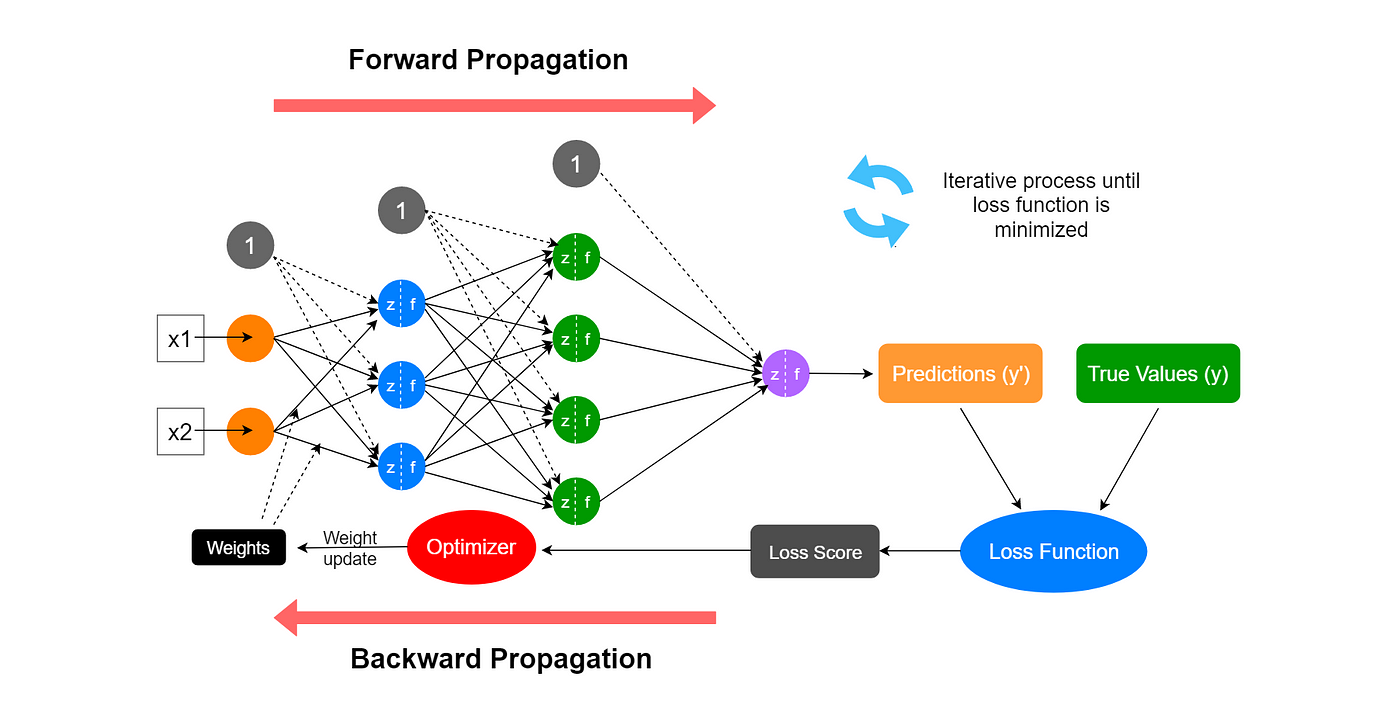


In [11]:
xg = torch.ones(5,2, requires_grad=True )
xg

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [26]:
xg.requires_grad

True

In [28]:
layer1 = xg + 2
layer1

tensor([[3., 3.],
        [3., 3.],
        [3., 3.],
        [3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [29]:
layer2 = layer1 * 2
layer2

tensor([[6., 6.],
        [6., 6.],
        [6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<MulBackward0>)

In [14]:
layer3 = layer2.mean()
layer3

tensor(6., grad_fn=<MeanBackward0>)

In [22]:
layer2_detach = layer2.detach()
layer2_detach.detach()

tensor([[6., 6.],
        [6., 6.],
        [6., 6.],
        [6., 6.],
        [6., 6.]])

In [23]:
layer2_detach.mean()

tensor(6.)

---
---
### Context-manager that disables gradient calculation
    torch.no_grad()
>Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward(). It will reduce memory consumption for computations 

In [30]:
x = layer2 * 2
print(x)
print(x.requires_grad)

tensor([[12., 12.],
        [12., 12.],
        [12., 12.],
        [12., 12.],
        [12., 12.]], grad_fn=<MulBackward0>)
True


In [31]:
with torch.no_grad():
    x = layer2 * 2
    print(x)
    print(x.requires_grad)

tensor([[12., 12.],
        [12., 12.],
        [12., 12.],
        [12., 12.],
        [12., 12.]])
False


# آموزش یک مدل ساده بدون گرادیان‌ پای تورچ

In [56]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

def forward(x, w):
    return w * x

def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

def gradient(x, y, y_predicted):
    return ((2.0 * x) * (y_predicted - y)).mean()

w = 0.0
n_iters = 30
learning_rate = 0.1

for epoch in range(n_iters):
    # Forward pass
    y_pred = forward(x, w)
    
    # Loss calculation
    l = loss(Y, y_pred)
    
    # Gradient calculation
    grad = gradient(x, Y, y_pred)
    
    print(f'Epoch: {epoch+1}, Predictions: {y_pred.detach()}, w: {w:.4f}, Grad: {grad.item():.5f}, Loss: {l:.5f}')
    
    # Weight update
    w -= learning_rate * grad


Epoch: 1, Predictions: tensor([0., 0., 0., 0.]), w: 0.0000, Grad: -30.00000, Loss: 30.00000
Epoch: 2, Predictions: tensor([ 3.,  6.,  9., 12.]), w: 3.0000, Grad: 15.00000, Loss: 7.50000
Epoch: 3, Predictions: tensor([1.5000, 3.0000, 4.5000, 6.0000]), w: 1.5000, Grad: -7.50000, Loss: 1.87500
Epoch: 4, Predictions: tensor([2.2500, 4.5000, 6.7500, 9.0000]), w: 2.2500, Grad: 3.75000, Loss: 0.46875
Epoch: 5, Predictions: tensor([1.8750, 3.7500, 5.6250, 7.5000]), w: 1.8750, Grad: -1.87500, Loss: 0.11719
Epoch: 6, Predictions: tensor([2.0625, 4.1250, 6.1875, 8.2500]), w: 2.0625, Grad: 0.93750, Loss: 0.02930
Epoch: 7, Predictions: tensor([1.9688, 3.9375, 5.9062, 7.8750]), w: 1.9688, Grad: -0.46875, Loss: 0.00732
Epoch: 8, Predictions: tensor([2.0156, 4.0312, 6.0469, 8.0625]), w: 2.0156, Grad: 0.23438, Loss: 0.00183
Epoch: 9, Predictions: tensor([1.9922, 3.9844, 5.9766, 7.9688]), w: 1.9922, Grad: -0.11719, Loss: 0.00046
Epoch: 10, Predictions: tensor([2.0039, 4.0078, 6.0117, 8.0156]), w: 2.0039

#  آموزش یک مدل ساده با استفاده از گرادیان‌ پای تورچ

In [47]:
import torch

def forward(x, w):
    return w * x

def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, requires_grad=True)
n_iters = 30
learning_rate = 0.1

for epoch in range(n_iters):
    # Forward pass
    y_pred = forward(x, w)
    
    # Loss calculation
    l = loss(Y, y_pred)
    
    # Backpropagation: Compute gradients
    l.backward()
     
    print(f'Epoch: {epoch+1}, Predictions: {y_pred.detach()}, w: {w.item():.4f}, Grad: {w.grad.item():.4f}, Loss: {l:.4f}')
    
    # Weight update
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # Manually zero the gradients after updating weights
    w.grad.zero_()


Epoch: 1, Predictions: tensor([0., 0., 0., 0.]), w: 0.0000, Grad: -30.0000, Loss: 30.0000
Epoch: 2, Predictions: tensor([ 3.,  6.,  9., 12.]), w: 3.0000, Grad: 15.0000, Loss: 7.5000
Epoch: 3, Predictions: tensor([1.5000, 3.0000, 4.5000, 6.0000]), w: 1.5000, Grad: -7.5000, Loss: 1.8750
Epoch: 4, Predictions: tensor([2.2500, 4.5000, 6.7500, 9.0000]), w: 2.2500, Grad: 3.7500, Loss: 0.4688
Epoch: 5, Predictions: tensor([1.8750, 3.7500, 5.6250, 7.5000]), w: 1.8750, Grad: -1.8750, Loss: 0.1172
Epoch: 6, Predictions: tensor([2.0625, 4.1250, 6.1875, 8.2500]), w: 2.0625, Grad: 0.9375, Loss: 0.0293
Epoch: 7, Predictions: tensor([1.9688, 3.9375, 5.9062, 7.8750]), w: 1.9688, Grad: -0.4688, Loss: 0.0073
Epoch: 8, Predictions: tensor([2.0156, 4.0312, 6.0469, 8.0625]), w: 2.0156, Grad: 0.2344, Loss: 0.0018
Epoch: 9, Predictions: tensor([1.9922, 3.9844, 5.9766, 7.9688]), w: 1.9922, Grad: -0.1172, Loss: 0.0005
Epoch: 10, Predictions: tensor([2.0039, 4.0078, 6.0117, 8.0156]), w: 2.0039, Grad: 0.0586, Lo

In [66]:
import torch.optim as optim

def forward(x, w):
    return w * x

x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, requires_grad=True)

# Using Adam optimizer
optimizer = optim.SGD([w], lr=0.1)

# Using PyTorch's built-in Mean Squared Error (MSE) loss
criterion = torch.nn.MSELoss()

n_iters = 30
for epoch in range(n_iters):
    # Forward pass
    y_pred = forward(x, w)
    
    # Loss calculation
    loss = criterion(y_pred, Y)
    
    print(f'Epoch: {epoch+1}, Predictions: {y_pred.detach()}, w: {w.item():.4f}, Loss: {loss.item():.4f}')
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Zero gradients
    optimizer.zero_grad()
    
   


Epoch: 1, Predictions: tensor([0., 0., 0., 0.]), w: 0.0000, Loss: 30.0000
Epoch: 2, Predictions: tensor([ 3.,  6.,  9., 12.]), w: 3.0000, Loss: 7.5000
Epoch: 3, Predictions: tensor([1.5000, 3.0000, 4.5000, 6.0000]), w: 1.5000, Loss: 1.8750
Epoch: 4, Predictions: tensor([2.2500, 4.5000, 6.7500, 9.0000]), w: 2.2500, Loss: 0.4688
Epoch: 5, Predictions: tensor([1.8750, 3.7500, 5.6250, 7.5000]), w: 1.8750, Loss: 0.1172
Epoch: 6, Predictions: tensor([2.0625, 4.1250, 6.1875, 8.2500]), w: 2.0625, Loss: 0.0293
Epoch: 7, Predictions: tensor([1.9688, 3.9375, 5.9062, 7.8750]), w: 1.9688, Loss: 0.0073
Epoch: 8, Predictions: tensor([2.0156, 4.0312, 6.0469, 8.0625]), w: 2.0156, Loss: 0.0018
Epoch: 9, Predictions: tensor([1.9922, 3.9844, 5.9766, 7.9688]), w: 1.9922, Loss: 0.0005
Epoch: 10, Predictions: tensor([2.0039, 4.0078, 6.0117, 8.0156]), w: 2.0039, Loss: 0.0001
Epoch: 11, Predictions: tensor([1.9980, 3.9961, 5.9941, 7.9922]), w: 1.9980, Loss: 0.0000
Epoch: 12, Predictions: tensor([2.0010, 4.0020